In [185]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import joblib
import matplotlib.pyplot as plt

In [186]:
data_path = '../data/training_data_with_rise_scores.csv'

data_df = pd.read_csv(data_path)
print(data_df.shape)
data_df.head()

(52010, 17)


bs1                    bs2  bs1_start_pos  bs2_start_pos  \
0  ZBTB7A_gacccctATGCTA        RELA_GGAAAATCCC       95336574       36740150   
1     TCF7_GCAGATGAAAGG  NEUROD1_CAACGGGAGACGG       28883589       18001772   
2   SPI1_GCGGGGAGGAAGTA  USF2_CAGGCCCACGTGCGCA         726605         726586   
3   MYOD1_CAGAGCAGGTGGG    PKNOX1_tgtaaactgtca       92728995       67268622   
4            AHR_cacaca           VDR_gctgggtc       77517311       73691293   

       dbbs             ng     dng  gene_start_pos chromosome  cluster  \
0  58596424   RP11-435O5.7   70416        95406990       chr9      NaN   
1  10881817      ZNRF3-IT1  109132        28992721      chr22      NaN   
2        19         DNAAF5      96          726701       chr7     10.0   
3  25460373  RP11-862G15.2  176702        92905697      chr14      NaN   
4   3826018    RP11-63N3.2  115617        77632928      chr18      NaN   

   motif1           binding   motif2  ppi_score  at_skew  gc_skew  Rise_score  
0  ZBTB7A  non_co_occurring     RELA      531.0     0.00    -0.43      103.48  
1    TCF7  non_co_occurring  NEUROD1      224.0     0.67     0.67      103.84  
2    SPI1      co_occurring     USF2      286.0     0.60     0.78         NaN  
3   MYOD1  non_co_occurring   PKNOX1      363.0     0.50     0.56      103.80  
4     AHR  non_co_occurring      VDR      473.0     1.00    -1.00      103.37

In [187]:
counts = data_df['cluster'].value_counts().reset_index()
counts

index  cluster
0     1006.0      393
1     1127.0      311
2      775.0      304
3      612.0      252
4     1654.0      244
...      ...      ...
1787   329.0        1
1788    93.0        1
1789  1588.0        1
1790   508.0        1
1791  1597.0        1

[1792 rows x 2 columns]

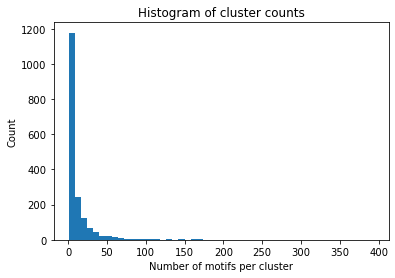

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(counts['cluster'], bins = 50)
plt.xlabel('Number of motifs per cluster')
plt.ylabel('Count')
plt.title('Histogram of cluster counts')
plt.show()
# counts

In [189]:
temp_df = pd.read_csv('../data/training_data_with_roll_scores.csv')
data_df['Roll_score'] = temp_df['Roll_score']
temp_df = pd.read_csv('../data/training_data_with_shift_scores.csv')
data_df['Shift_score'] = temp_df['Shift_score']
temp_df = pd.read_csv('../data/training_data_with_slide_scores.csv')
data_df['Slide_score'] = temp_df['Slide_score']
temp_df = pd.read_csv('../data/training_data_with_tilt_scores.csv')
data_df['Tilt_score'] = temp_df['Tilt_score']

data_df.head()

bs1                    bs2  bs1_start_pos  bs2_start_pos  \
0  ZBTB7A_gacccctATGCTA        RELA_GGAAAATCCC       95336574       36740150   
1     TCF7_GCAGATGAAAGG  NEUROD1_CAACGGGAGACGG       28883589       18001772   
2   SPI1_GCGGGGAGGAAGTA  USF2_CAGGCCCACGTGCGCA         726605         726586   
3   MYOD1_CAGAGCAGGTGGG    PKNOX1_tgtaaactgtca       92728995       67268622   
4            AHR_cacaca           VDR_gctgggtc       77517311       73691293   

       dbbs             ng     dng  gene_start_pos chromosome  cluster  ...  \
0  58596424   RP11-435O5.7   70416        95406990       chr9      NaN  ...   
1  10881817      ZNRF3-IT1  109132        28992721      chr22      NaN  ...   
2        19         DNAAF5      96          726701       chr7     10.0  ...   
3  25460373  RP11-862G15.2  176702        92905697      chr14      NaN  ...   
4   3826018    RP11-63N3.2  115617        77632928      chr18      NaN  ...   

            binding   motif2 ppi_score  at_skew  gc_skew  Rise_score  \
0  non_co_occurring     RELA     531.0     0.00    -0.43      103.48   
1  non_co_occurring  NEUROD1     224.0     0.67     0.67      103.84   
2      co_occurring     USF2     286.0     0.60     0.78         NaN   
3  non_co_occurring   PKNOX1     363.0     0.50     0.56      103.80   
4  non_co_occurring      VDR     473.0     1.00    -1.00      103.37   

   Roll_score  Shift_score  Slide_score  Tilt_score  
0      -32.85         1.27       -47.83       -2.02  
1      -18.79         0.19       -48.86       -2.33  
2         NaN          NaN          NaN         NaN  
3       -4.58         0.10       -48.39       -1.00  
4       -5.92        -0.14       -45.76        0.56  

[5 rows x 21 columns]

# Feature Engineering

In [190]:
data_df.head()

bs1                    bs2  bs1_start_pos  bs2_start_pos  \
0  ZBTB7A_gacccctATGCTA        RELA_GGAAAATCCC       95336574       36740150   
1     TCF7_GCAGATGAAAGG  NEUROD1_CAACGGGAGACGG       28883589       18001772   
2   SPI1_GCGGGGAGGAAGTA  USF2_CAGGCCCACGTGCGCA         726605         726586   
3   MYOD1_CAGAGCAGGTGGG    PKNOX1_tgtaaactgtca       92728995       67268622   
4            AHR_cacaca           VDR_gctgggtc       77517311       73691293   

       dbbs             ng     dng  gene_start_pos chromosome  cluster  ...  \
0  58596424   RP11-435O5.7   70416        95406990       chr9      NaN  ...   
1  10881817      ZNRF3-IT1  109132        28992721      chr22      NaN  ...   
2        19         DNAAF5      96          726701       chr7     10.0  ...   
3  25460373  RP11-862G15.2  176702        92905697      chr14      NaN  ...   
4   3826018    RP11-63N3.2  115617        77632928      chr18      NaN  ...   

            binding   motif2 ppi_score  at_skew  gc_skew  Rise_score  \
0  non_co_occurring     RELA     531.0     0.00    -0.43      103.48   
1  non_co_occurring  NEUROD1     224.0     0.67     0.67      103.84   
2      co_occurring     USF2     286.0     0.60     0.78         NaN   
3  non_co_occurring   PKNOX1     363.0     0.50     0.56      103.80   
4  non_co_occurring      VDR     473.0     1.00    -1.00      103.37   

   Roll_score  Shift_score  Slide_score  Tilt_score  
0      -32.85         1.27       -47.83       -2.02  
1      -18.79         0.19       -48.86       -2.33  
2         NaN          NaN          NaN         NaN  
3       -4.58         0.10       -48.39       -1.00  
4       -5.92        -0.14       -45.76        0.56  

[5 rows x 21 columns]

In [191]:
def get_skew_score(bs_seq):
    
    bs_seq = bs_seq.lower()
    a_count = bs_seq.count('a')
    g_count = bs_seq.count('g')
    c_count = bs_seq.count('c')
    t_count = bs_seq.count('t')
    
    if ((g_count+c_count) == 0 or (a_count+t_count) == 0):
        return((g_count-c_count)/(g_count+c_count + 1), (a_count-t_count)/(a_count+t_count + 1))
    else:
        return((g_count-c_count)/(g_count+c_count), (a_count-t_count)/(a_count+t_count))
        
combined_at_skew = []
combined_gc_skew = []

for ix, row, in data_df.iterrows():
    
    gc, at = get_skew_score(row['bs1'].split('_')[1] + row['bs2'].split('_')[1])
    combined_at_skew.append(at)
    combined_gc_skew.append(gc)
    
data_df['combined_at_skew'] = combined_at_skew
data_df['combined_gc_skew'] = combined_gc_skew

In [192]:
# Elminating null values
data_df = data_df[pd.notnull(data_df['Rise_score'])]
data_df = data_df[pd.notnull(data_df['Roll_score'])]
data_df = data_df[pd.notnull(data_df['Shift_score'])]
data_df = data_df[pd.notnull(data_df['Slide_score'])]
data_df = data_df[pd.notnull(data_df['Tilt_score'])]

# Removing outliers
data_df = data_df[(data_df['dng'] < 250000) &
                  (data_df['dbbs'] < 100000000)]
df1 = data_df[(data_df['binding'] == 'co_occurring')]
df2 = data_df[(data_df['binding'] == 'non_co_occurring') & (data_df['ppi_score'] < 750)]

data_df = pd.concat([df1, df2])
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.shape

(35141, 23)

In [193]:
data_df.drop(['bs1', 'bs2', 'bs1_start_pos', 'bs2_start_pos', 'ng', 'gene_start_pos', 'cluster', 'dng', 'dbbs'], 
            axis=1, inplace= True)
data_df.head()

chromosome  motif1           binding motif2  ppi_score  at_skew  gc_skew  \
0       chr7    IRF3      co_occurring   NFYA      159.0     0.09    -0.20   
1       chr6   GATA1      co_occurring   TAL1      994.0    -0.14     0.00   
2      chr13  NFATC1  non_co_occurring   IRF9      171.0    -0.33     0.50   
3      chr11    CREM      co_occurring  NR4A1      466.0     0.60    -0.20   
4       chr2    DUX4  non_co_occurring   ETV6      302.0     0.50    -0.33   

   Rise_score  Roll_score  Shift_score  Slide_score  Tilt_score  \
0      103.70      -26.95         1.01       -47.73       -1.03   
1      103.67      -11.63        -0.72       -46.55        1.91   
2      103.15      -48.36         1.02       -43.15        1.47   
3      103.80      -22.11        -0.07       -47.03        0.05   
4      103.33      -26.18         0.37       -43.96       -2.49   

   combined_at_skew  combined_gc_skew  
0          0.176471         -0.200000  
1         -0.200000          0.000000  
2          0.076923          0.166667  
3          0.400000          0.200000  
4          0.454545          0.600000

In [194]:
X = data_df.loc[:, data_df.columns != 'binding']
y = data_df['binding']

X.shape

(35141, 13)

In [195]:
chromosomes = pd.unique(X['chromosome'])
le1 = LabelEncoder()
le1.fit(chromosomes)
X['chromosome'] = le1.transform(X['chromosome'])

motif1 = pd.unique(X['motif1'])
le2 = LabelEncoder()
le2.fit(motif1)
X['motif1'] = le2.transform(X['motif1'])

motif2 = pd.unique(X['motif2'])
le3 = LabelEncoder()
le3.fit(motif2)
X['motif2'] = le3.transform(X['motif2'])


X.head()

<ipython-input-195-96f61d1e0602>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-195-96f61d1e0602>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-195-96f61d1e0602>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


chromosome  motif1  motif2  ppi_score  at_skew  gc_skew  Rise_score  \
0          19      84     124      159.0     0.09    -0.20      103.70   
1          18      65     191      994.0    -0.14     0.00      103.67   
2           4     117      86      171.0    -0.33     0.50      103.15   
3           2      25     134      466.0     0.60    -0.20      103.80   
4          11      29      51      302.0     0.50    -0.33      103.33   

   Roll_score  Shift_score  Slide_score  Tilt_score  combined_at_skew  \
0      -26.95         1.01       -47.73       -1.03          0.176471   
1      -11.63        -0.72       -46.55        1.91         -0.200000   
2      -48.36         1.02       -43.15        1.47          0.076923   
3      -22.11        -0.07       -47.03        0.05          0.400000   
4      -26.18         0.37       -43.96       -2.49          0.454545   

   combined_gc_skew  
0         -0.200000  
1          0.000000  
2          0.166667  
3          0.200000  
4          0.600000

In [196]:
X, y = shuffle(X, y)

# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [197]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd

scaler = MinMaxScaler()
scaler.fit(X.astype(np.float64))
X_scaled = scaler.transform(X.astype(np.float64))


chi2_score, chi_2_p_value = chi2(X_scaled,y)
f_score, f_p_value = f_classif(X_scaled,y)
mut_info_score = mutual_info_classif(X_scaled,y)
pairwise_tukeyhsd = [list(pairwise_tukeyhsd(X_scaled[:,i],y).reject) for i in range(X_train.shape[1])]

for ix, column in enumerate(X.columns):
    print('-------------------------------------------------------------')
    print(column)
    print('chi2 score        ', chi2_score[ix])
    print('chi2 p-value      ', chi_2_p_value[ix])
    print('F - score score   ', f_score[ix])
    print('F - score p-value ', f_p_value[ix])
    print('mutual info       ', mut_info_score[ix])
    print(chi2_score[ix], '\n', chi_2_p_value[ix], '\n', f_score[ix], '\n', f_p_value[ix], '\n', mut_info_score[ix])
    


-------------------------------------------------------------
chromosome
chi2 score         52.62590386956447
chi2 p-value       4.0353157176546713e-13
F - score score    313.80139783188616
F - score p-value  6.539127669229197e-70
mutual info        0.06207113699298761
52.62590386956447 
 4.0353157176546713e-13 
 313.80139783188616 
 6.539127669229197e-70 
 0.06207113699298761
-------------------------------------------------------------
motif1
chi2 score         765.2916890081096
chi2 p-value       1.8988126871601613e-168
F - score score    4825.311091218203
F - score p-value  0.0
mutual info        0.2100937464536472
765.2916890081096 
 1.8988126871601613e-168 
 4825.311091218203 
 0.0 
 0.2100937464536472
-------------------------------------------------------------
motif2
chi2 score         225.0536860215044
chi2 p-value       7.146629279808869e-51
F - score score    1745.924596983285
F - score p-value  0.0
mutual info        0.19492407606526174
225.0536860215044 
 7.14662927980886

### Visualisations

In [142]:
from plotnine import *
%matplotlib inline

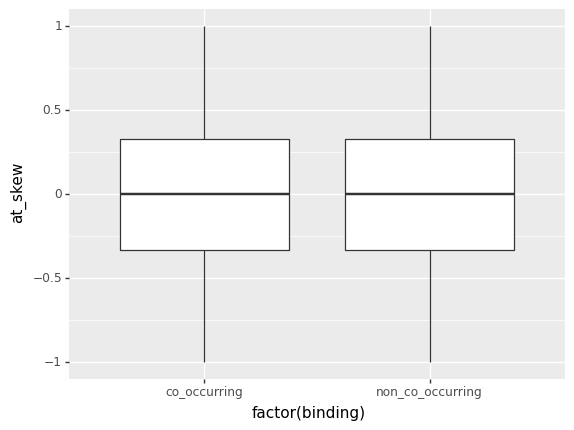

<ggplot: (8772639899519)>


<ggplot: (8772639900450)>


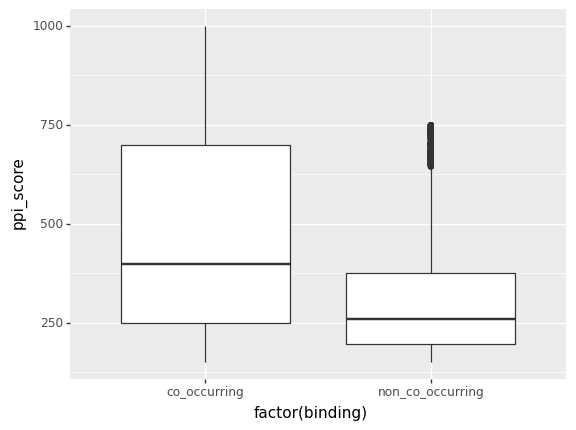

<ggplot: (8772639899645)>


<ggplot: (8772639912265)>


<ggplot: (8772636850938)>


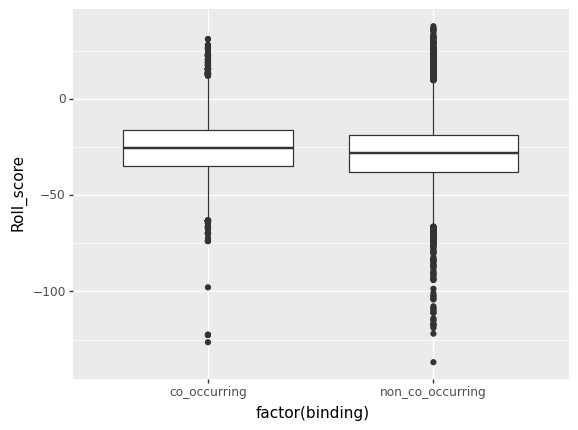

<ggplot: (8772641151242)>


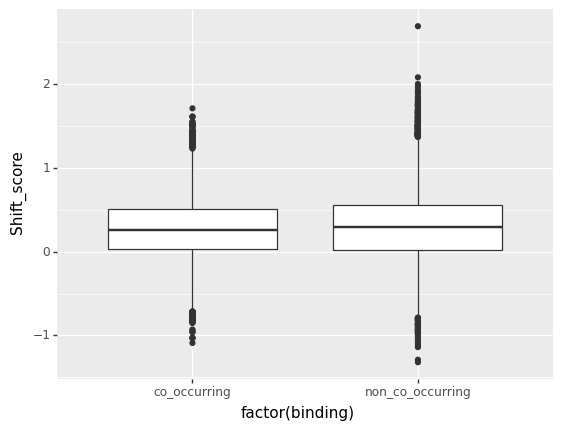

<ggplot: (8772641149004)>


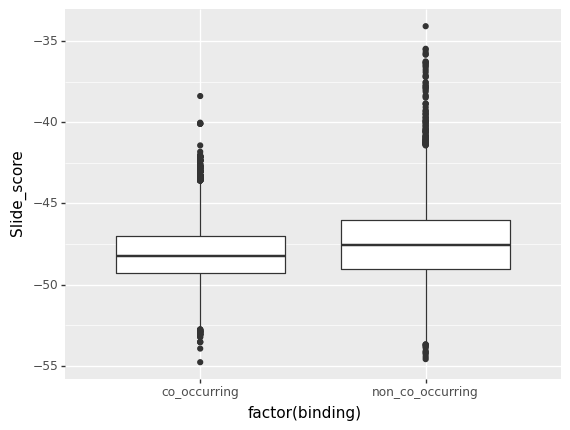

<ggplot: (8772641151371)>


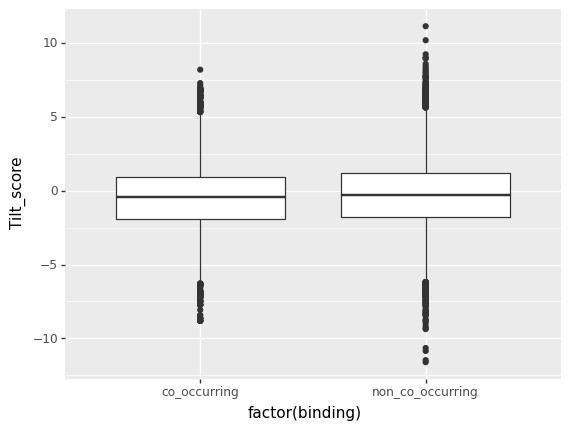

<ggplot: (8772650541806)>


In [143]:
for column in ['at_skew', 'gc_skew', 'ppi_score', 'chromosome', 'Rise_score', 'Roll_score', 'Shift_score', 'Slide_score', 'Tilt_score']:
    plot = ggplot(data_df) + geom_boxplot(aes(x='factor(binding)', y= str(column)))
    print(plot)
    #     + scale_x_discrete(labels=months, name='month')  # change ticks labels on OX

# Method 1

In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

print(X_train.head(10))
print(y_train[:10])

       chromosome  motif1  motif2  ppi_score  at_skew  gc_skew  Rise_score  \
14503          10     103      89      377.0     0.25     0.50      103.81   
12578           8     122     191      242.0     0.00    -0.09      103.98   
25254           7      66      70      711.0    -0.43     0.00      103.43   
8567            7     163     105      260.0    -1.00     0.14      103.22   
1295            5     208     176      520.0     0.08    -0.20      102.97   
11544          20      85     181      871.0     0.33     0.67      103.45   
19719           9     184     133      266.0    -0.20    -0.09      104.06   
10267           7      49      89      269.0     0.33     0.71      103.88   
15374          16      44      65      331.0     0.67     1.00      103.55   
34019           5     212     125      467.0     0.00    -0.14      103.91   

       Roll_score  Shift_score  Slide_score  Tilt_score  combined_at_skew  \
14503      -37.43         0.83       -48.71       -1.69         

In [145]:
scaler = MinMaxScaler()
# Train
scaler.fit(X.astype(np.float64))
X_train_scaled = scaler.transform(X_train.astype(np.float64))
# test
X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [146]:
print(('# DEBUG: y_train: ', np.unique(y_train, return_counts=True)))
print(('# DEBUG: y_test: ', np.unique(y_test, return_counts=True)))

('# DEBUG: y_train: ', (array([0, 1]), array([13851, 14261])))
('# DEBUG: y_test: ', (array([0, 1]), array([3389, 3640])))


In [147]:
X_train_scaled

array([[0.43478261, 0.54424779, 0.00442478, ..., 0.60712714, 0.35714286,
        0.5       ],
       [0.82608696, 0.11061947, 0.39380531, ..., 0.49142103, 0.45454545,
        0.5       ],
       [0.91304348, 0.57522124, 0.89380531, ..., 0.3457985 , 0.22222222,
        0.5625    ],
       ...,
       [0.30434783, 0.89380531, 0.89823009, ..., 0.42454905, 1.        ,
        0.56521739],
       [0.30434783, 0.        , 0.2079646 , ..., 0.27936648, 0.66666667,
        0.45454545],
       [0.86956522, 0.49115044, 0.06637168, ..., 0.4641443 , 0.85714286,
        0.33333333]])

In [148]:
# Number of input features
n_features = X_train_scaled.shape[1]
n_features

13

In [149]:
# Model definition
model = Sequential()

model.add(Dense(50,activation='relu',kernel_initializer='he_normal',input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [150]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=128)


Epoch 1/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7250
Epoch 2/1000
220/220 [==============================] - 0s 978us/step - loss: 0.4324 - accuracy: 0.7629
Epoch 3/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.7768
Epoch 4/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.7788
Epoch 5/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.7840
Epoch 6/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.7888
Epoch 7/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.7923
Epoch 8/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.7967
Epoch 9/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.7998
Epoch 10/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3

220/220 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8486
Epoch 81/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8475
Epoch 82/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8469
Epoch 83/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8481
Epoch 84/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8478
Epoch 85/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8476
Epoch 86/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8481
Epoch 87/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8485
Epoch 88/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8489
Epoch 89/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.3028 - a

220/220 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8721
Epoch 159/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.8725
Epoch 160/1000
220/220 [==============================] - 0s 979us/step - loss: 0.2661 - accuracy: 0.8722
Epoch 161/1000
220/220 [==============================] - 0s 915us/step - loss: 0.2641 - accuracy: 0.8709
Epoch 162/1000
220/220 [==============================] - 0s 902us/step - loss: 0.2615 - accuracy: 0.8728
Epoch 163/1000
220/220 [==============================] - 0s 895us/step - loss: 0.2590 - accuracy: 0.8750
Epoch 164/1000
220/220 [==============================] - 0s 977us/step - loss: 0.2586 - accuracy: 0.8742
Epoch 165/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.8748
Epoch 166/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8741
Epoch 167/1000
220/220 [==============================] - 0s 1ms/step

220/220 [==============================] - 0s 953us/step - loss: 0.2270 - accuracy: 0.8915
Epoch 237/1000
220/220 [==============================] - 0s 932us/step - loss: 0.2302 - accuracy: 0.8886
Epoch 238/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.8916
Epoch 239/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.8893
Epoch 240/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.8892
Epoch 241/1000
220/220 [==============================] - 0s 934us/step - loss: 0.2257 - accuracy: 0.8910
Epoch 242/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.8890
Epoch 243/1000
220/220 [==============================] - 0s 990us/step - loss: 0.2241 - accuracy: 0.8929
Epoch 244/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.8921
Epoch 245/1000
220/220 [==============================] - 0s 1ms/step -

220/220 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.8990
Epoch 315/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.8993
Epoch 316/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9001
Epoch 317/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9008
Epoch 318/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.9026
Epoch 319/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.9013
Epoch 320/1000
220/220 [==============================] - 0s 961us/step - loss: 0.2018 - accuracy: 0.9012
Epoch 321/1000
220/220 [==============================] - 0s 995us/step - loss: 0.2051 - accuracy: 0.9006
Epoch 322/1000
220/220 [==============================] - 0s 923us/step - loss: 0.2015 - accuracy: 0.9029
Epoch 323/1000
220/220 [==============================] - 0s 945us/step -

220/220 [==============================] - 0s 936us/step - loss: 0.1878 - accuracy: 0.9071
Epoch 393/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9090
Epoch 394/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9094
Epoch 395/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9103
Epoch 396/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9038
Epoch 397/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9082
Epoch 398/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9100
Epoch 399/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9092
Epoch 400/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9106
Epoch 401/1000
220/220 [==============================] - 0s 1ms/step - loss:

220/220 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9155
Epoch 471/1000
220/220 [==============================] - 0s 935us/step - loss: 0.1744 - accuracy: 0.9132
Epoch 472/1000
220/220 [==============================] - 0s 909us/step - loss: 0.1832 - accuracy: 0.9096
Epoch 473/1000
220/220 [==============================] - 0s 981us/step - loss: 0.1817 - accuracy: 0.9100
Epoch 474/1000
220/220 [==============================] - 0s 928us/step - loss: 0.1732 - accuracy: 0.9148
Epoch 475/1000
220/220 [==============================] - 0s 981us/step - loss: 0.1736 - accuracy: 0.9141
Epoch 476/1000
220/220 [==============================] - 0s 959us/step - loss: 0.1776 - accuracy: 0.9120
Epoch 477/1000
220/220 [==============================] - 0s 936us/step - loss: 0.1741 - accuracy: 0.9134
Epoch 478/1000
220/220 [==============================] - 0s 950us/step - loss: 0.1709 - accuracy: 0.9157
Epoch 479/1000
220/220 [==============================] - 0s 95

220/220 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.9163
Epoch 549/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 0.9151
Epoch 550/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9143
Epoch 551/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9118
Epoch 552/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9148
Epoch 553/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.9163
Epoch 554/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9187
Epoch 555/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9148
Epoch 556/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9174
Epoch 557/1000
220/220 [==============================] - 0s 1ms/step - loss: 0

220/220 [==============================] - 0s 1ms/step - loss: 0.1563 - accuracy: 0.9197
Epoch 627/1000
220/220 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9222
Epoch 628/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9211
Epoch 629/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9188
Epoch 630/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9183
Epoch 631/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1508 - accuracy: 0.9215
Epoch 632/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9180
Epoch 633/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1571 - accuracy: 0.9204
Epoch 634/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9207
Epoch 635/1000
220/220 [==============================] - 0s 1ms/step - loss: 0

220/220 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.9242
Epoch 705/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9158
Epoch 706/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1529 - accuracy: 0.9219
Epoch 707/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9258
Epoch 708/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9271
Epoch 709/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9193
Epoch 710/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9216
Epoch 711/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.9198
Epoch 712/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9202
Epoch 713/1000
220/220 [==============================] - 0s 1ms/step - loss: 0

220/220 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.9204
Epoch 783/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9232
Epoch 784/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9257
Epoch 785/1000
220/220 [==============================] - 0s 971us/step - loss: 0.1383 - accuracy: 0.9255
Epoch 786/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9230
Epoch 787/1000
220/220 [==============================] - 0s 975us/step - loss: 0.1567 - accuracy: 0.9203
Epoch 788/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9253
Epoch 789/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9230
Epoch 790/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9224
Epoch 791/1000
220/220 [==============================] - 0s 1ms/step - los

220/220 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9276
Epoch 861/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9225
Epoch 862/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9239
Epoch 863/1000
220/220 [==============================] - 0s 993us/step - loss: 0.1436 - accuracy: 0.9256
Epoch 864/1000
220/220 [==============================] - 0s 989us/step - loss: 0.1424 - accuracy: 0.9255
Epoch 865/1000
220/220 [==============================] - 0s 995us/step - loss: 0.1351 - accuracy: 0.9288
Epoch 866/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9275
Epoch 867/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9261
Epoch 868/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.9270
Epoch 869/1000
220/220 [==============================] - 0s 1ms/step - l

220/220 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.9272
Epoch 939/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.9262
Epoch 940/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9297
Epoch 941/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9239
Epoch 942/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9319
Epoch 943/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.9261
Epoch 944/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9244
Epoch 945/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9268
Epoch 946/1000
220/220 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9292
Epoch 947/1000
220/220 [==============================] - 0s 1ms/step - loss: 0

In [165]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print(('Test Accuracy: %.3f' % acc))

220/220 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.8273
Test Accuracy: 0.827


In [ ]:
model.summary()

In [ ]:
# Save model
joblib.dump(scaler, scalerFilePath)
model.save(modelFilePath)
# return model


In [ ]:
X_train

## Method 2

In [ ]:
import tensorflow as tf

In [ ]:
data_df

In [ ]:
data_df['binding'] = LabelEncoder().fit_transform(data_df['binding'])
data_df

In [ ]:
test_split = int(0.2 * len(data_df))
input_data_train = data_df.iloc[:-test_split, 0:-2].to_numpy().astype(np.float32)
label_data_train = data_df.iloc[:-test_split, -1].to_numpy()
label_data_train = np.expand_dims(label_data_train, 1).astype(np.float32)

input_data_test = data_df.iloc[-test_split:, 0:-2].to_numpy().astype(np.float32)
label_data_test = data_df.iloc[-test_split:, -1].to_numpy()
label_data_test = np.expand_dims(label_data_test, 1).astype(np.float32)


print("Train data (input):", input_data_train)
print("Train data (label):", label_data_train)

print("Train data shape (input):", input_data_train.shape)
print("Train data shape (label):", label_data_train.shape)
print("Test data shape (input):", input_data_test.shape)
print("Test data shape (label):", label_data_test.shape)


In [ ]:
regression_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

loss_function = tf.keras.losses.MSE
# loss_function = tf.keras.losses.SparseCategoricalCrossentropy

regression_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

In [ ]:
print('Training the model with train data')
training_history = regression_model.fit(input_data_train, label_data_train, epochs=3, batch_size=10, validation_data=(input_data_test, label_data_test))

print('Evaluating the model with test data')
regression_model.evaluate(input_data_test, label_data_test)